# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [33]:
bc_df = pd.read_csv("breast-cancer-wisconsin-data.csv")
bc_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [34]:
bc_df = bc_df.drop(labels="ID", axis=1)

In [35]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [36]:
bc_df.shape

(699, 10)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [37]:
bc_df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [38]:
bc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [39]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [40]:
temp = bc_df.isna()

In [41]:
temp[temp['ClumpThickness'] == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [42]:
temp[temp['Cell Size'] == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [43]:
temp[temp['Cell Shape'] == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [44]:
temp[temp['Marginal Adhesion'] == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [45]:
temp[temp['Single Epithelial Cell Size'] == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [46]:
temp[temp['Normal Nucleoli'] == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [47]:
temp[temp['Bland Chromatin'] == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [48]:
temp[temp['Mitoses'] == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [49]:
temp[temp['Class'] == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [50]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [51]:
bc_df['Bare Nuclei'].value_counts()['?']

16

In [59]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [52]:
bc_df = bc_df.replace('?', np.nan)

In [55]:
bc_df = bc_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [58]:
bc_df['Bare Nuclei'] = bc_df['Bare Nuclei'].astype('int64')  

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

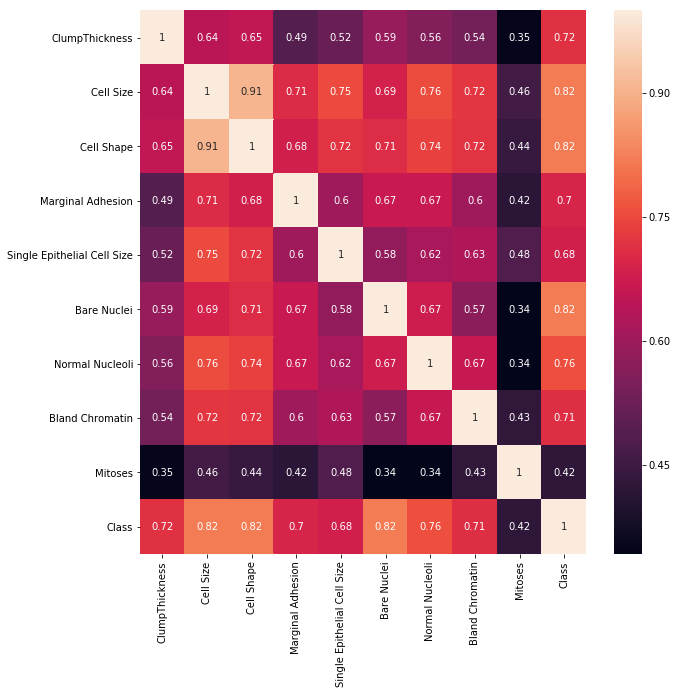

In [62]:
bc_corr_matrix = bc_df.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(bc_corr_matrix, annot=True)

In [1]:
#Let us check for pair plots

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


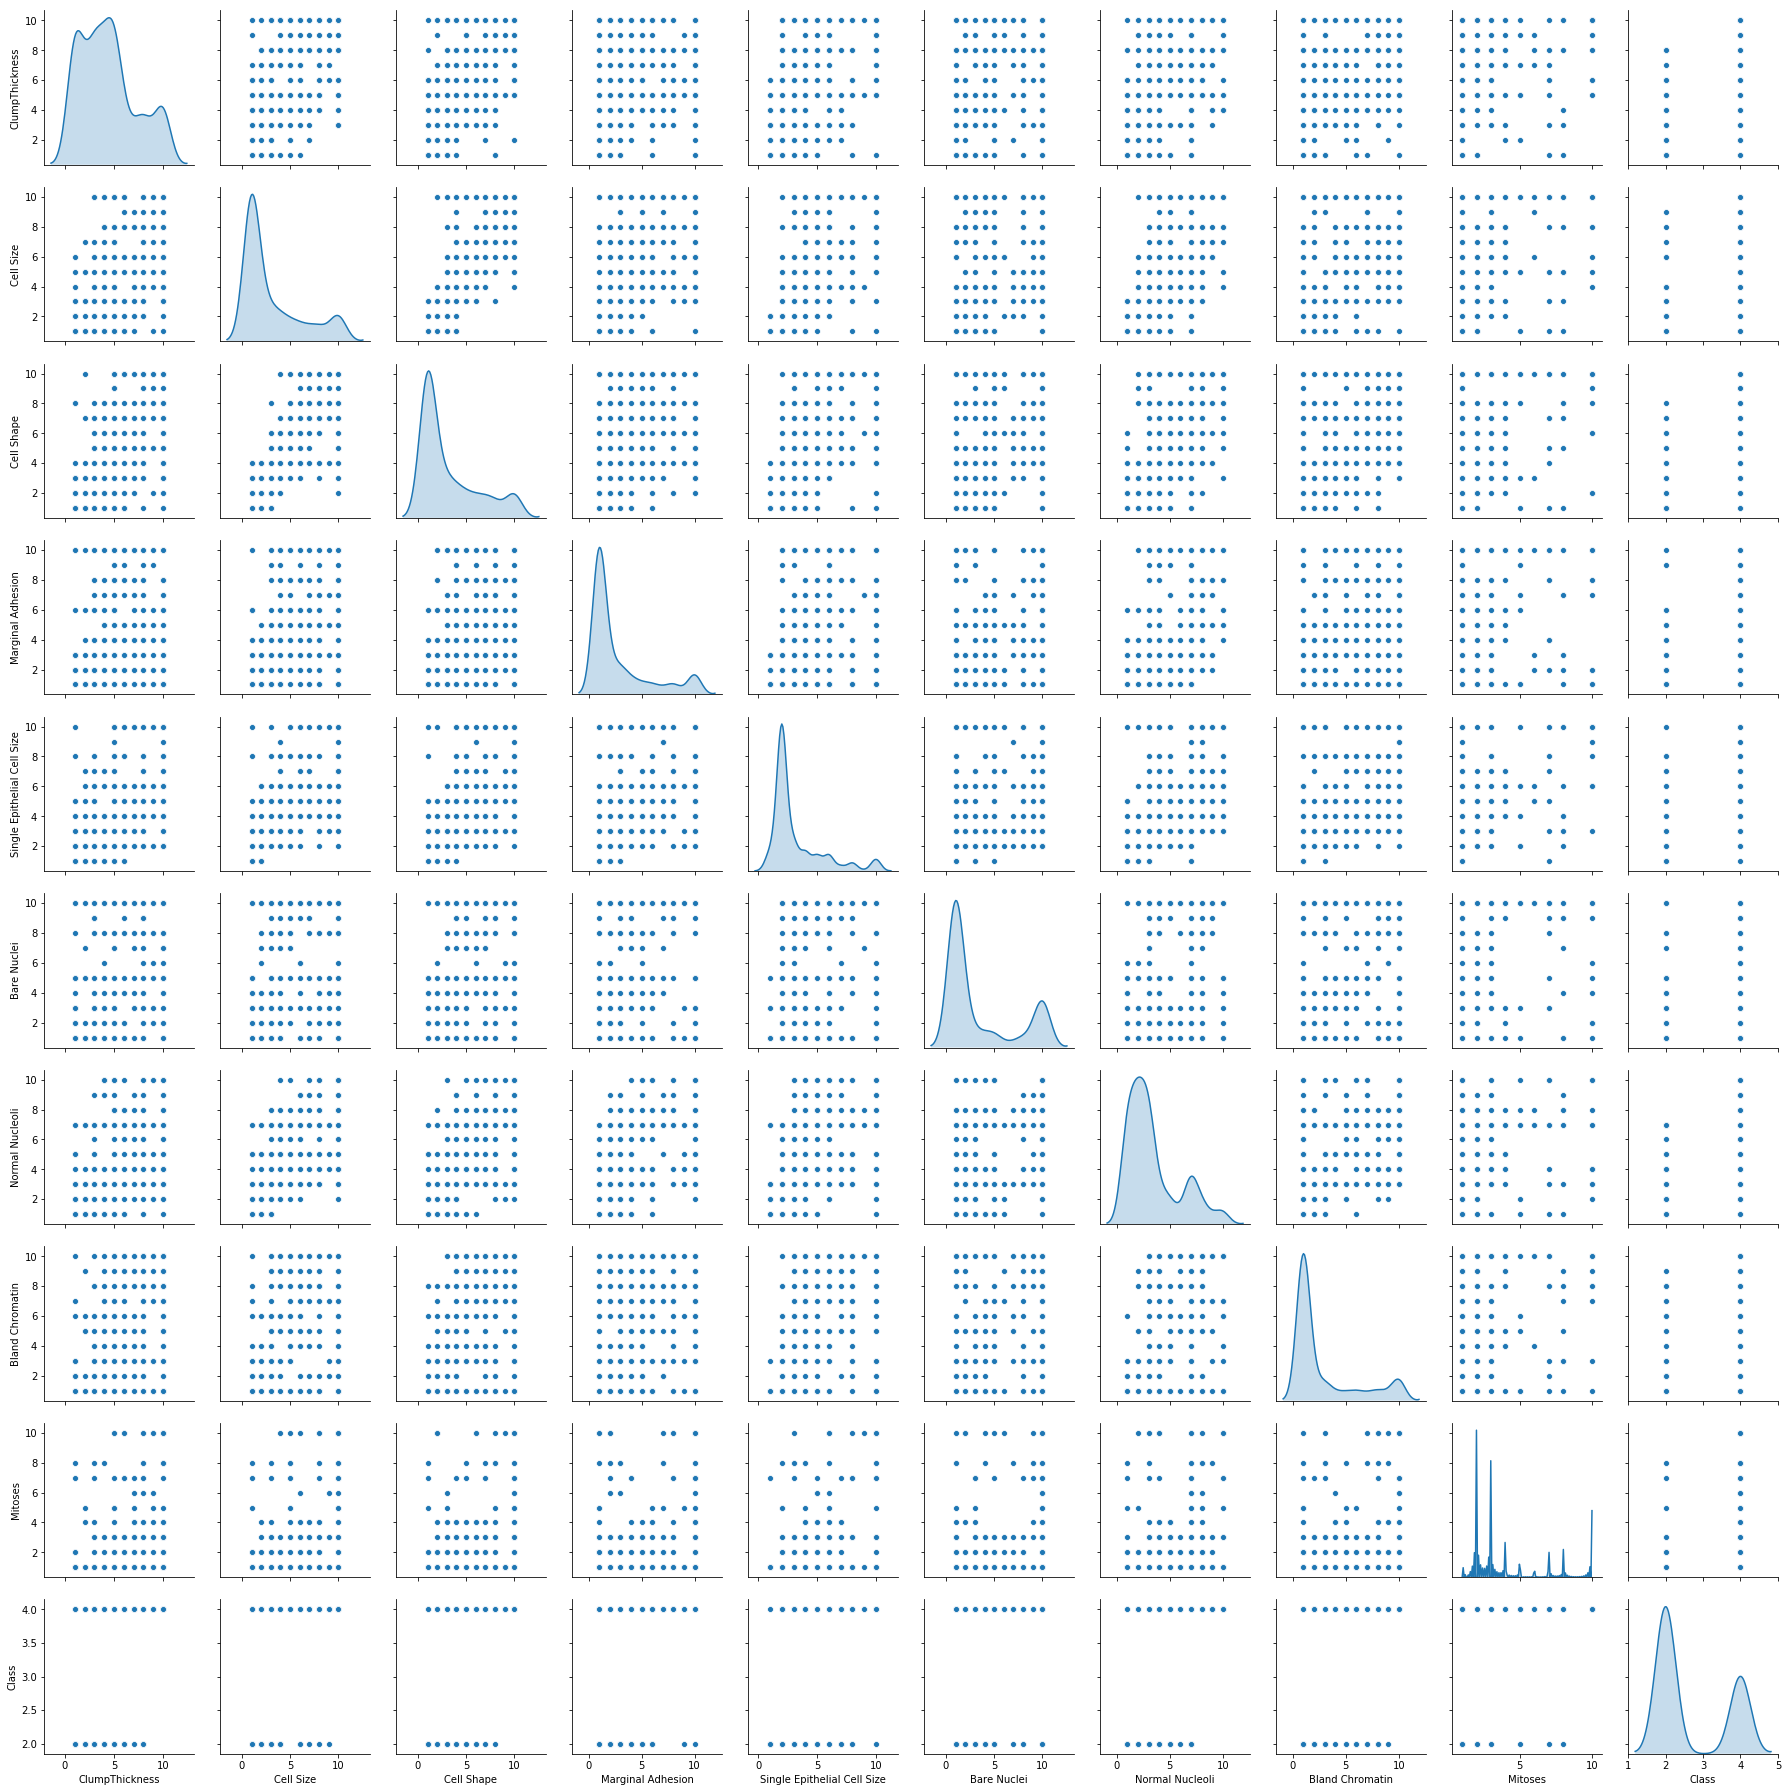

In [63]:
sns.pairplot(bc_df, diag_kind='kde') 

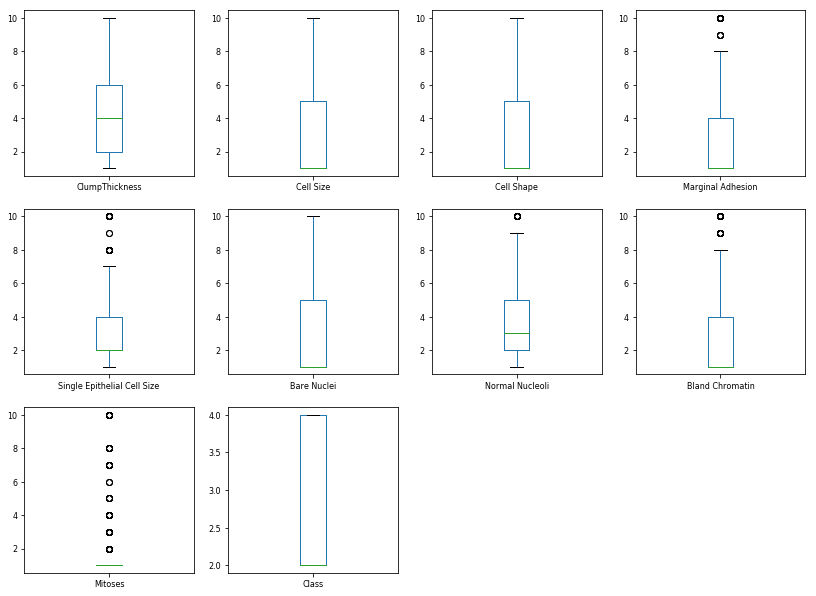

In [66]:
bc_df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

In [67]:
bc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [68]:
X = bc_df.drop(labels='Class', axis=1)
y = bc_df["Class"]

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)

In [73]:
X_std

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.34391178]])

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [75]:
X_cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', X_cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5908535
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68765657
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.70848734
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66792658
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.5845377
  0.61698451 0.62978166 0.47978787]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.5845377  1.00143266
  0.67518063 0.5756016  0.34288766]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.67518063
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.5756016
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.34288766
  0.34466258 0.42894941 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [76]:
eigenvalues, eigenvectors = np.linalg.eig(X_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.63180293
   0.08247514 -0.03841564 -0.50406321]
 [-0.22981766 -0.90839421 -0.09459348 -0.0075291  -0.23968608  0.1316273
  -0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [77]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.898551899582235, array([-0.30280515, -0.38119012, -0.37757351, -0.33282286, -0.33639134,
       -0.33349748, -0.3459564 , -0.33584019, -0.22981766])), (0.7758830680807655, array([ 0.14602888,  0.04956364,  0.08526953,  0.04471887, -0.16403795,
        0.2477099 ,  0.22994199, -0.02502678, -0.90839421])), (0.5396015548199171, array([-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
       -0.00367104,  0.19744944,  0.13164974, -0.09459348])), (0.46640555062123307, array([-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
       -0.5431767 , -0.00698988,  0.45537199, -0.23968608])), (0.3810177552503903, array([ 0.07192848, -0.13735749, -0.10469081,  0.03462797, -0.68258246,
       -0.1275059 ,  0.25519148,  0.63180293,  0.1316273 ])), (0.30405591873920385, array([ 0.26946934,  0.1000979 ,  0.03200191,  0.68083355, -0.03559797,
       -0.57486596, -0.31459721, -0.03841564, -0.14360708])), (0.29609473619399895, array([-0.00131277,  0.21521315,  0.14204379, 

In [78]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

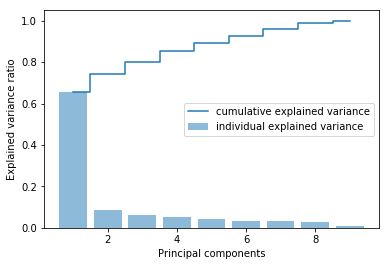

In [80]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [81]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=8)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [82]:
X_std_pca = pca.transform(X_std)
print(X_std_pca.shape)

(699, 8)


# Q10 Find correlation between components and features

In [90]:
pca.components_

array([[ 0.30280515,  0.38119012,  0.37757351,  0.33282286,  0.33639134,
         0.33349748,  0.3459564 ,  0.33584019,  0.22981766],
       [-0.14602888, -0.04956364, -0.08526953, -0.04471887,  0.16403795,
        -0.2477099 , -0.22994199,  0.02502678,  0.90839421],
       [-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
        -0.00367104,  0.19744944,  0.13164974, -0.09459348],
       [-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
        -0.5431767 , -0.00698988,  0.45537199, -0.23968608],
       [-0.07192848,  0.13735749,  0.10469081, -0.03462797,  0.68258246,
         0.1275059 , -0.25519148, -0.63180293, -0.1316273 ],
       [ 0.26946934,  0.1000979 ,  0.03200191,  0.68083355, -0.03559797,
        -0.57486596, -0.31459721, -0.03841564, -0.14360708],
       [-0.00131277,  0.21521315,  0.14204379, -0.0861038 , -0.18337725,
        -0.41187463,  0.67301535, -0.50406321,  0.12567403],
       [ 0.24081701, -0.44088652, -0.58600968,  0.11866965,  0

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [91]:
jokes_df = pd.read_csv("jokes.csv")
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [92]:
jokes_df.dtypes

NumJokes      int64
Joke1       float64
Joke2       float64
Joke3       float64
Joke4       float64
Joke5       float64
Joke6       float64
Joke7       float64
Joke8       float64
Joke9       float64
Joke10      float64
Joke11      float64
Joke12      float64
Joke13      float64
Joke14      float64
Joke15      float64
Joke16      float64
Joke17      float64
Joke18      float64
Joke19      float64
Joke20      float64
Joke21      float64
Joke22      float64
Joke23      float64
Joke24      float64
Joke25      float64
Joke26      float64
Joke27      float64
Joke28      float64
Joke29      float64
             ...   
Joke71      float64
Joke72      float64
Joke73      float64
Joke74      float64
Joke75      float64
Joke76      float64
Joke77      float64
Joke78      float64
Joke79      float64
Joke80      float64
Joke81      float64
Joke82      float64
Joke83      float64
Joke84      float64
Joke85      float64
Joke86      float64
Joke87      float64
Joke88      float64
Joke89      float64


In [93]:
jokes_df.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [94]:
ratings = jokes_df.head(200)

In [96]:
ratings = ratings.drop(labels='NumJokes', axis=1)

In [97]:
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [102]:
ratings.columns = list(range(100))

In [103]:
ratings.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.